In [6]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df_base = pd.read_csv("agent_47_base/train_stats.csv")
df = pd.read_csv("agent_47/train_stats.csv")

print("df sommaire")
display( df.describe() )

print("df valeurs manquantes")
display( df.isna().sum().to_frame().T )

print("df valeurs dupliqueess")
dup = df.duplicated(keep="last")
display( df[dup] )

df sommaire


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeMS
count,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.0,99.500000,59.465000,4.245000,355.500000,0.099996,370.060510
std,0.0,57.879185,47.888677,4.487277,432.556674,0.203691,294.091153
min,0.0,0.000000,2.000000,0.000000,-50.000000,0.000037,10.276000
25%,0.0,49.750000,17.000000,0.000000,-12.500000,0.000474,97.953250
50%,0.0,99.500000,55.500000,3.000000,200.000000,0.006076,318.183000
75%,0.0,149.250000,91.250000,7.000000,600.000000,0.077957,617.662750
max,0.0,199.000000,217.000000,18.000000,1700.000000,1.000000,996.479000


df valeurs manquantes


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeMS
0,0,0,0,0,0,0,0


df valeurs dupliqueess


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeMS


Max score: 18 at: 197


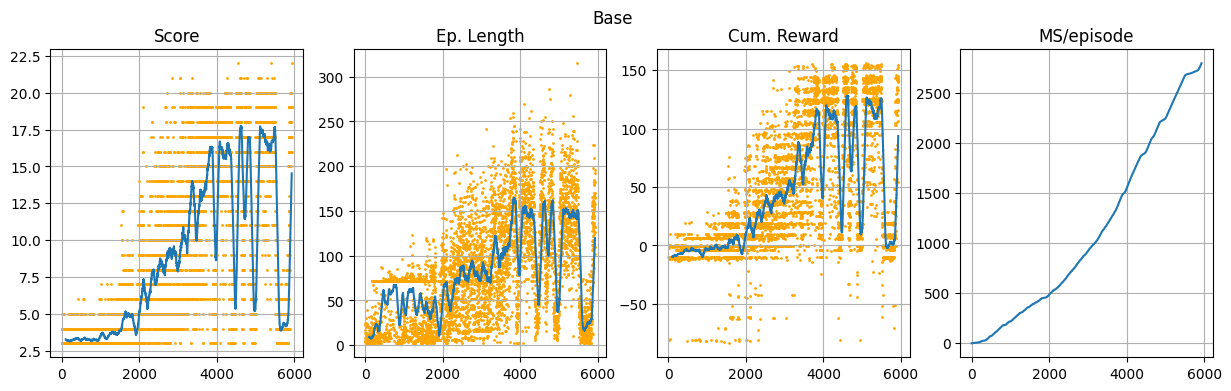

Total time: 6677.77


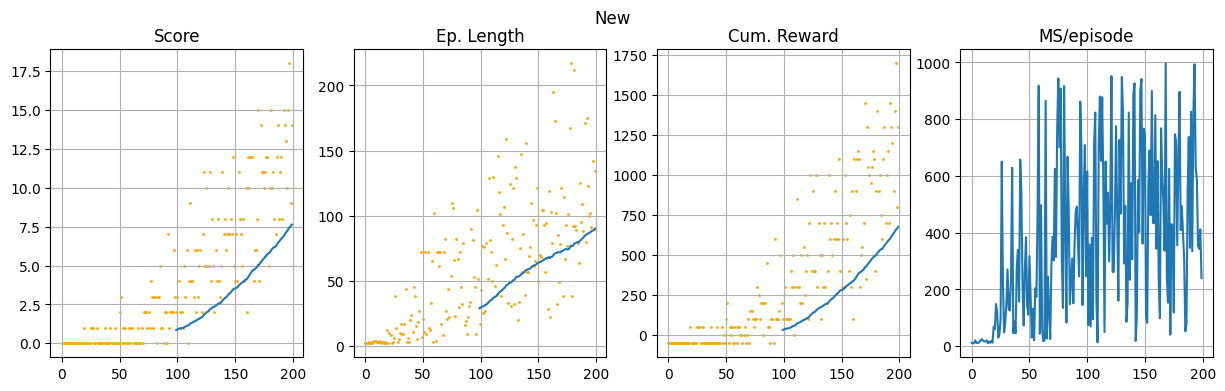

Total time: 74.01


In [8]:
def graph(df, title, ROLLING=100):
    plt.figure(figsize=(15, 4))

    plt.subplot(141)
    plt.plot(df.Episode, df.Score.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.Score, s=1, color="orange")
    plt.title("Score")
    plt.grid()

    plt.subplot(142)
    plt.plot(df.Episode, df.EpisodeLength.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.EpisodeLength, s=1, color="orange")
    plt.title("Ep. Length")
    plt.grid()

    plt.subplot(143)
    if False:
        plt.plot(df.Episode, df.Epsilon)
        plt.title("Epsilon")
    else:
        plt.plot(df.Episode, df.CumulativeReward.rolling(ROLLING).mean())
        plt.scatter(df.Episode, df.CumulativeReward, s=1, color="orange")
        plt.title("Cum. Reward")
    plt.grid()

    plt.subplot(144)
    plt.plot(df.Episode, df.EpisodeMS)
    plt.title("MS/episode")
    plt.grid()

    plt.suptitle(title)
    plt.show()

    seconds = df.EpisodeMS.sum() / 1000
    print("Total time:", round(seconds, 2))

print("Max score:", df.Score.max(), "at:", df.Score.argmax())

graph(df_base, "Base")
graph(df, "New")